# **Word Embeddings**


In this exercise you will learn about word vectors.
A word vector is a way of representeing words using linear algebra and numbers in a vector space.
They can be learned using different methods, like probabilistic methods and neural networks.

This exercise is diveded into the following parts:

- Prediction of word analogies.
- Reduce the dimensions of a vector space and plot it in a human-readable format.
- Compare word embeddings by using a similarity measure (the cosine similarity).
- Understand how these vector space models work.



## **Predict Capital Cities of the World**


In this exercise, we'll try to predict a country given its capital, only by using word embeddings (no ML model)

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from utils import get_vectors

In [3]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


### **Observation on the dataset**

In this exercise, we will use a file called `word_embeddings_capitals.p` that contains the pre-trained word embeddings of capital cities.
This dataset comes originally from the google news word embedding dataset, which is about 3.64 gigabytes. We don't need all of those 3.64 gigas, se we are only using a small portion of that.


You can, however, download the full dataset on your own and choose your own set of word embeddings.
To do so, see the instructions from Google here: (and good luck on that) (this is **not** needed for this exercise)
- Download the dataset from this [page](https://code.google.com/archive/p/word2vec/).
- Search in the page for 'GoogleNews-vectors-negative300.bin.gz' and click the link to download.

Now we will load the word embeddings as a [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).
Remember, those word vectors have been learned using a machine learning algorithm from Google. 

In [4]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)  # there should be 243 words that will be used in this assignment

243

Each of the word embedding is a 300-dimensional vector.

In [5]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


In [19]:
px.imshow(pd.DataFrame(word_embeddings), title="Representation of the Word2Vec embeddings of Countries and Capitals")

### ***How is this different from last week ?***

* Comment on the new shape of the matrix, how does it compare to BoW and TF-IDF ?
  * ***Your*** thoughts here
* Does this seem more or less efficient, why ?
  * ***Your*** thoughts here
* What is the possible range of values for these encodings, how does it compare to BoW and TF-IDF ? 
  * ***Your*** thoughts here

### **Predict relationships among words**

Now you will write a function that will use the word embeddings to predict relationships among words.
* The function will take as input three words.
* The first two are related to each other.
* It will predict a 4th word which is related to the third word in a similar manner as the two first words are related to each other.
* As an example, "Athens is to Greece as Bangkok is to ______"?
* You will write a program that is capable of finding the fourth word.

A similar analogy would be the following:

#### *King - Man + Woman = Queen*

You will implement a function that can tell you the capital of a country.
You should use the same methodology shown in the figure above. To do this,
compute you'll first compute cosine similarity metric or the Euclidean distance.

### **Cosine Similarity**

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index i of that vector.
& Note that if A and B are identical, you will get $cos(\theta) = 1$.
* Otherwise, if they are the total opposite, meaning, $A= -B$, then you would get $cos(\theta) = -1$.
* If you get $cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
* Numbers between 0 and 1 indicate a similarity score.
* Numbers between -1-0 indicate a dissimilarity score.

**Instructions**: Implement a function that takes in two word vectors and computes the cosine distance.

PS:
* Python's [NumPy library](https://docs.scipy.org/doc/numpy/reference/) adds support for linear algebra operations (e.g., dot product, vector norm ...).
* Use [numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)
* Use [numpy.linalg.nor](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)

In [5]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    
    # Your code here:
    # use np.linalg and np.dot to compute the cosine similarity

    return cos

In [21]:
# compute the cosine similarity between king and queen

0.6510956


#### You should get:
$\approx$ 0.6510956

### **Euclidean distance**

You will now implement a function that computes the similarity between two vectors using the Euclidean distance.
Euclidean distance is defined as:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ is the number of elements in the vector
* $A$ and $B$ are the corresponding word vectors. 
* The more similar the words, the more likely the Euclidean distance will be close to 0. 

**Instructions**: Write a function that computes the Euclidean distance between two vectors.

PS:
* Use [numpy.linalg.norm](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)

In [7]:
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """

    # compute the euclidean distance between two numpy arrays

    return d


In [8]:
# compute the euclidean distance between king and queen

2.4796925

#### You should get:

2.4796925

### **Finding the country of each capital**

Now, you  will use the previous functions to compute similarities between vectors,
and use these to find the capital cities of countries. You will write a function that
takes in three words, and the embeddings dictionary. Your task is to find the
capital cities. For example, given the following words: 

- 1: Athens 2: Greece 3: Baghdad,

your task is to predict the country 4: Iraq.

**Instructions**: 

1. To predict the capital you might want to look at the *King - Man + Woman = Queen* example above, and implement that scheme into a mathematical function, using the word embeddings and a similarity function.

2. Iterate over the embeddings dictionary and compute the cosine similarity score between your vector and the current word embedding.

3. You should add a check to make sure that the word you return is not any of the words that you fed into your function. Return the one with the highest score.

In [9]:
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """

    # store the city1, country 1, and city 2 in a set called group

    # get embeddings of city 1

    # get embedding of country 1

    # get embedding of city 2

    # get embedding of country 2 (it's a combination of the embeddings of country 1, city 1 and city 2)
    # Remember: King - Man + Woman = Queen

    # Initialize the similarity to -1 (it will be replaced by a similarities that are closer to +1)

    # initialize country to an empty string

    # loop through all words in the embeddings dictionary

        # first check that the word is not already in the 'group'

            # get the word embedding

            # calculate cosine similarity between embedding of country 2 and the word in the embeddings dictionary

            # if the cosine similarity is more similar than the previously best similarity...

                # update the similarity to the new, better similarity

                # store the country as a tuple, which contains the word and the similarity

    return country

In [10]:
# Testing your function, note to make it more robust you can return the 5 most similar words.
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

#### You should get:

('Egypt', 0.7626821)

### **Accuracy**

Now you will test your new function on the dataset and check the accuracy of the model:

$$\text{Accuracy}=\frac{\text{Correct \# of predictions} }{\text{Total \# of predictions} }$$

**Instructions**: Write a program that can compute the accuracy on the dataset provided for you. You have to iterate over every row to get the corresponding words and feed them into you `get_country` function above. 

PS: 
* Use [pandas.DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html)


In [11]:
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs
    
    Output:
        accuracy: the accuracy of the model
    '''

    # initialize num correct to zero
    num_correct = 0

    # loop through the rows of the dataframe

        # get city1

        # get country1

        # get city2

        # get country2

        # use get_country to find the predicted country2

        # if the predicted country2 is the same as the actual country2...

            # increment the number of correct by 1

    # get the number of rows in the data dataframe (length of dataframe)

    # calculate the accuracy by dividing the number correct by m

    return accuracy

**NOTE: The cell below takes about 30 SECONDS to run.**

In [12]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


#### You should get:

$\approx$ 0.92

# **Plotting the vectors using PCA**
### ***This section is already programmed. Just go by it and understand what each part of the code is doing. Explain it in your final report.***

Now you will explore the distance between word vectors after reducing their dimension.
The technique we will employ is known as
[*principal component analysis* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
As we saw, we are working in a 300-dimensional space in this case.
Although from a computational perspective we were able to perform a good job,
it is impossible to visualize results in such high dimensional spaces.

You can think of PCA as a method that projects our vectors in a space of reduced
dimension, while keeping the maximum information about the original vectors in
their reduced counterparts. In this case, by *maximum infomation* we mean that the
Euclidean distance between the original vectors and their projected siblings is
minimal. Hence vectors that were originally close in the embeddings dictionary,
will produce lower dimensional vectors that are still close to each other.

You will see that when you map out the words, similar words will be clustered
next to each other. For example, the words 'sad', 'happy', 'joyful' all describe
emotion and are supposed to be near each other when plotted.
The words: 'oil', 'gas', and 'petroleum' all describe natural resources.
Words like 'city', 'village', 'town' could be seen as synonyms and describe a
similar thing.

Before plotting the words, you need to first be able to reduce each word vector
with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$). 
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data.

The following code that takes in a data set where each row corresponds to a word vector. 

* The word vectors are of dimension 300. 
* Uses PCA to change the 300 dimensions to `n_components` dimensions. 
* The new matrix is of dimension `m, n_componentns`. 

Those are the steps taken:
* First de-mean the data
* Get the eigenvalues using `linalg.eigh`.  Use `eigh` rather than `eig`.  The performance gain when using `eigh` instead of `eig` is substantial.
* Sort the eigenvectors and eigenvalues by decreasing order of the eigenvalues.
* Get a subset of the eigenvectors (choose how many principle components you want to use using `n_components`).
* Return the new transformation of the data by multiplying the eigenvectors with the original data.

In [13]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """

    # mean center the data
    X_demeaned = X - np.mean(X, axis=0)

    # calculate the covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:,:n_components]

    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.transpose(np.matmul(np.transpose(eigen_vecs_subset), np.transpose(X_demeaned)))

    return X_reduced


In [14]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323 -0.49820384]
 [ 0.42077249  0.50351448]
 [-0.85514571 -0.00531064]]


#### You should get:

Your original matrix was: (3,10) and it became:

<table>
    <tr>
        <td>
           0.43437323
            </td>
                <td>
            0.49820384
            </td>
    </tr>
    <tr>
        <td>
            0.42077249
            </td>
                <td>
           -0.50351448
            </td>
    </tr>
    <tr>
        <td>
            -0.85514571
            </td>
                <td>
           0.00531064
            </td>
    </tr>
</table>

Now you will use your pca function to plot a few words.
You will see that similar words tend to be clustered near each other.
Sometimes, even antonyms tend to be clustered near each other. Antonyms
describe the same thing but just tend to be on the other end of the scale
They are usually found in the same location of a sentence,
have the same parts of speech, and thus when
learning the word vectors, you end up getting similar weights. 

Run the cell below.

In [15]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (11, 300)


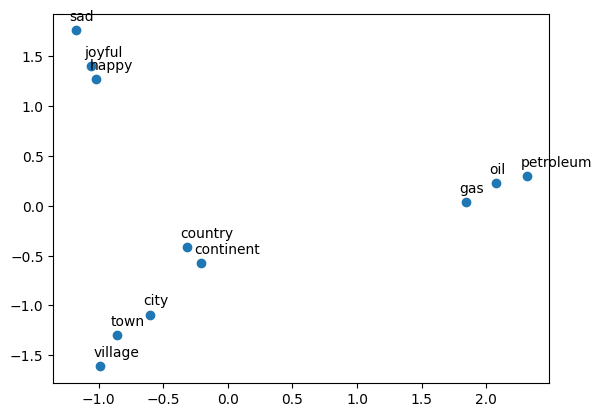

In [16]:
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

## ***What can you notice from this graph ?*** 
* ***Your*** thoughts here   